# Упражнение №1 Работа с геометрическими объектами

[GITHUB](https://github.com/AutoGIS-2020/Exercise-1)

В первом наборе задач (1-2) вы определите свои собственные функции для обработки геометрических объектов. Во втором наборе задач (3-4) вы будете считывать данные из файла с помощью панд и создавать геометрии на основе информации о координатах во входных данных.


#### 1. Создание базовой геометрии:

###### 1.1 Создайте функцию create_point_geom() с двумя параметрами (x_coord, y_coord). Функция должна создать фигурный точечный геометрический объект и вернуть его.

In [1]:
import os
from shapely.geometry import Point, LineString, Polygon

In [2]:
# функция проверки правильности ввода координат
def point_coordinates_check(x_coord, y_coord):
    """
        Функция проверяет корректность ввода координат
    """
    # value1 -parameter
    assert type(x_coord) in [int, float], "Входное значение для 'x_coord' должно быть целым числом или числом с плавающей запятой! Нашел: %s" % type(x_coord)

    # value2 -parameter
    assert type(y_coord) in [int, float], "Входное значение для 'y_coord' должно быть целым числом или числом с плавающей запятой! Нашел: %s" % type(y_coord)

    return 

In [3]:
# функция создающая линии
def create_point_geom(x_coord, y_coord):
    """
        Функция создаёт фигурный точечный геометрический объект и возвращает его
    """
    # проверка корректности ввода
    point_coordinates_check(x_coord, y_coord)
    
    object = Point(x_coord, y_coord)
    return object

Тип геометрии: Point
POINT (0 1.1)


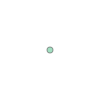

In [6]:
# Demonstrate the usage of the function create_point_geom
# point1 = create_point_geom('a', 1.1)
point1 = create_point_geom(0.0, 1.1)
print(f"Тип геометрии: {point1.geom_type}")
print(point1)
point1

###### 1.2 Создайте функцию create_line_geom (), которая принимает список объектов Shapely Point в качестве параметра points и возвращает объект LineString этих входных точек. Кроме того, вы должны позаботиться о том, чтобы функция использовалась так, как она должна:

- Внутри функции вы должны сначала проверить с помощью ``assert-functionality``, что входные данные представляют собой список (см. Урок 6 из курса Geo-Python и подсказки для этого упражнения). Если для функции передается что-то другое, чем список, вы должны вернуть сообщение об ошибке: ``"Ввод должен быть списком!"``
- Вы также должны проверить с помощью assert, что входной список содержит по крайней мере два значения. Если нет, верните сообщение об ошибке: ``"Объект LineString требует как минимум двух точек!"``
- **Необязательно:** наконец, вы должны проверить с помощью ``assert``, что все значения во входном списке действительно являются точками формы. Если нет, верните сообщение об ошибке: ``"Все значения списка должны быть стройными точечными объектами!"``

In [112]:
# функция проверки правильности ввода координат 
def points_list_check(list_points):
    """
        Функция проверяет корректность ввода координат для линии
        1. проверка является переменная списком или нет
        2. проверка корректности ввода координат
        
    """
    # проверка является переменная списком или нет
    assert type(list_points) == list, "Ввод должен быть списком!"
    
    # проверка корректности ввода координат
    for coord in list_points:
        # проверка размера и типа данных
        assert type(coord) == tuple, "Все значения списка должны быть координатными кортежами!"
        assert len(coord) == 2, "Отсутствует одна или две координаты!"
        # проверка координат
        point_coordinates_check(coord[0], coord[1])
        
    return 

In [113]:
# Проверка
list_points1 = [(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)]
# list_points1 = (2.2, 4.2)
list_p = points_list_check(list_points1)

In [114]:
# функция создающая линии
def create_line_geom (list_points):
    """
        Функция создаёт фигурный линейный геометрический объект и возвращает его
        1. Проверка корректности ввода координат для линии
        2. Проверка список содержит минимум два значения
        3. Создание линии
    """
    # проверка корректности ввода координат для линии
    points_list_check(list_points)
    
    # проверка список содержит минимум два значения
    assert len(list_points) >= 2, "Объект LineString требует как минимум двух точек!"
    
    object = LineString(list_points)
    return object

Тип геометрии: LineString
LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456)


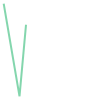

In [117]:
# Проверка
list_points1 = [(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)]
# list_points1 = (2.2, 4.2)
list_p = create_line_geom(list_points1)
print(f"Тип геометрии: {list_p.geom_type}")
print(list_p)
list_p

###### Создаем объект line с двумя точками: Point(45.2, 22.34) & Point(100.22, -3.20) и сохраните результат в переменной line1:

Тип геометрии: LineString
LINESTRING (45.2 22.34, 100.22 -3.2)


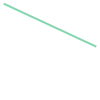

In [118]:
list_points2 = [(45.2, 22.34), (100.22, -3.20)]
line1 = create_line_geom(list_points2)
print(f"Тип геометрии: {line1.geom_type}")
print(line1)
line1

Проверьте, правильно ли ваша функция проверяет входные данные, запустив эту ячейку кода:

In [119]:
try:
    # Передайте что-нибудь еще, кроме списка
#     create_line_geom("Дай мне строчку!")
    create_line_geom([(45.2, 22.34), (100.22, -3.20)])
except AssertionError:
    print("Обнаружена ошибка утверждения. Проверка списка работает правильно.")
except Exception as e:
    raise e

###### 1.3 Создайте функцию create_poly_geom() с одним параметром coords. параметр coords должен содержать список кортежей координат. Функция должна создавать и возвращать полигональный объект на основе этих координат.

- Внутри функции вы должны сначала проверить с помощью assert-functionality, что входные данные представляют собой список (см. Урок 6 и подсказки). Если для функции передается что-то другое, чем список, вы должны вернуть сообщение об ошибке: ``"Ввод должен быть списком!"``
- Вы также должны проверить с помощью assert, что входной список содержит по крайней мере три значения. Если нет, верните сообщение об ошибке: ``"Полигональный объект требует не менее трех точек!"``
- Проверьте тип данных объектов во входном списке. Все значения во входном списке должны быть кортежами. Если нет, верните сообщение об ошибке: ``"Все значения списка должны быть координатными кортежами!"`` с помощью assert.
- **Необязательно:** разрешите также ввод, содержащий список фигурных точечных объектов. Если coords содержит список фигурных точечных объектов, верните полигон, основанный на этих точках. Если входные данные не являются ни списком кортежей, ни списком точек, верните соответствующее сообщение об ошибке с помощью assert.

In [123]:
def create_poly_geom(list_points):
    """
       Функция создаёт полигональный геометрический объект и возвращает его
        1. Проверка корректности ввода координат для полигона
        2. Проверка список содержит минимум три значения
        3. Создание полигона
    """
    print(list_points)
    # список точечные объекты
#         if coord.geom_type == 'Point':
#             coord_xy = (coord.x, coord.y)

#             assert type(coord_xy) == tuple, "Все значения списка должны быть координатными кортежами!"
#             assert len(coord_xy) == 2, "Отсутствует одна или две координаты!"

#             point_coordinates_check(coord_xy[0], coord_xy[1])
            
#             print(type(coord_xy))
#         else:
    
    # проверка корректности ввода координат для полигона 
    points_list_check(list_points)
    
    # проверка список содержит минимум три значения
    assert len(list_points) >= 3, "Объект LineString требует как минимум три точки!"    
    
    object = Polygon(list_points)
    return object 

In [128]:
list_points1 = [(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)]
type(list_points1)
# poly1 = create_poly_geom(list_points1)
# print(f"Тип геометрии: {poly1.geom_type}")
# print(poly1)
# poly1

list

In [126]:
# создадим три точечных объекта
point1 = create_point_geom(2.2, 4.2)
point2 = create_point_geom(7.2, -25.1) 
point3 = create_point_geom(9.26, -2.456)

# создадим список точек
list_points3 = [point1, point2, point3]
list_points3
# Создадим полигон
# poly2 = create_poly_geom(list_points3)